In [29]:
import pandas as pd
from fetch import hit_gov_data

In [30]:
df = hit_gov_data(offset=0, length=5000, end_date='2024-01')

In [31]:
df.isna().sum()

period                0
stateid               0
stateDescription      0
sectorid              0
sectorName            0
customers           833
price               833
revenue             833
sales               833
customers-units       0
price-units           0
revenue-units         0
sales-units           0
dtype: int64

In [32]:
df[(df['stateid']=='MD') & (df['sectorid']=='RES')]

,period,stateid,stateDescription,sectorid,sectorName,customers,price,revenue,sales,customers-units,price-units,revenue-units,sales-units
0,2023-09,MD,Maryland,RES,residential,2431160.0,16.96,375.82097,2215.58311,number of customers,cents per kilowatthour,million dollars,million kilowatthours
663,2023-08,MD,Maryland,RES,residential,2429658.0,16.35,431.98451,2642.54595,number of customers,cents per kilowatthour,million dollars,million kilowatthours
806,2023-07,MD,Maryland,RES,residential,2428046.0,16.03,463.06933,2887.89109,number of customers,cents per kilowatthour,million dollars,million kilowatthours
1153,2023-06,MD,Maryland,RES,residential,2427170.0,16.99,334.54401,1969.06761,number of customers,cents per kilowatthour,million dollars,million kilowatthours
1786,2023-05,MD,Maryland,RES,residential,2426004.0,16.08,267.50220,1663.98981,number of customers,cents per kilowatthour,million dollars,million kilowatthours
2083,2023-04,MD,Maryland,RES,residential,2425944.0,15.91,274.87139,1727.16111,number of customers,cents per kilowatthour,million dollars,million kilowatthours
2578,2023-03,MD,Maryland,RES,residential,2426467.0,15.85,348.56671,2199.67197,number of customers,cents per kilowatthour,million dollars,million kilowatthours
2936,2023-02,MD,Maryland,RES,residential,2423960.0,16.21,357.64479,2206.17096,number of customers,cents per kilowatthour,million dollars,million kilowatthours
3270,2023-01,MD,Maryland,RES,residential,2421516.0,15.97,401.98277,2516.41400,number of customers,cents per kilowatthour,million dollars,million kilowatthours
3656,2022-12,MD,Maryland,RES,residential,2424156.0,15.53,436.30499,2809.69318,number of customers,cents per kilowatthour,million dollars,million kilowatthours


In [33]:
df['sales-units'].value_counts()

sales-units
million kilowatthours    5000
Name: count, dtype: int64

In [34]:
def separate_dimensionality(df):
    frame = df.copy()
    frame = frame.drop(['customers-units', 'price-units', 'revenue-units', 'sales-units'], axis=1)
    metrics = df[['customers-units', 'price-units', 'revenue-units', 'sales-units']]
    metrics = metrics.head(1).to_dict(orient='records')[0]
    return metrics, frame
    

In [35]:
metrics, df = separate_dimensionality(df)

In [36]:
metrics

{'customers-units': 'number of customers',
 'price-units': 'cents per kilowatthour',
 'revenue-units': 'million dollars',
 'sales-units': 'million kilowatthours'}

In [37]:
df['stateid'].value_counts()

stateid
NEW    84
ESC    84
AK     84
AL     84
US     84
       ..
IA     78
KS     78
KY     78
LA     78
MA     78
Name: count, Length: 62, dtype: int64

In [38]:
df

,period,stateid,stateDescription,sectorid,sectorName,customers,price,revenue,sales
0,2023-09,MD,Maryland,RES,residential,2431160.0,16.96,375.82097,2215.58311
1,2023-09,MD,Maryland,OTH,other,NaN,NaN,NaN,NaN
2,2023-09,MD,Maryland,IND,industrial,9068.0,9.81,29.15505,297.29678
3,2023-09,MD,Maryland,COM,commercial,261375.0,12.45,302.44559,2428.78351
4,2023-09,MD,Maryland,ALL,all sectors,2701608.0,14.29,711.59168,4978.10583
...,...,...,...,...,...,...,...,...,...
4995,2022-08,AZ,Arizona,OTH,other,NaN,NaN,NaN,NaN
4996,2022-08,AZ,Arizona,IND,industrial,7828.0,9.30,118.89254,1278.39722
4997,2022-08,AZ,Arizona,COM,commercial,338833.0,11.46,380.20519,3317.04510
4998,2022-08,AZ,Arizona,ALL,all sectors,3358671.0,12.03,1112.79678,9251.04031


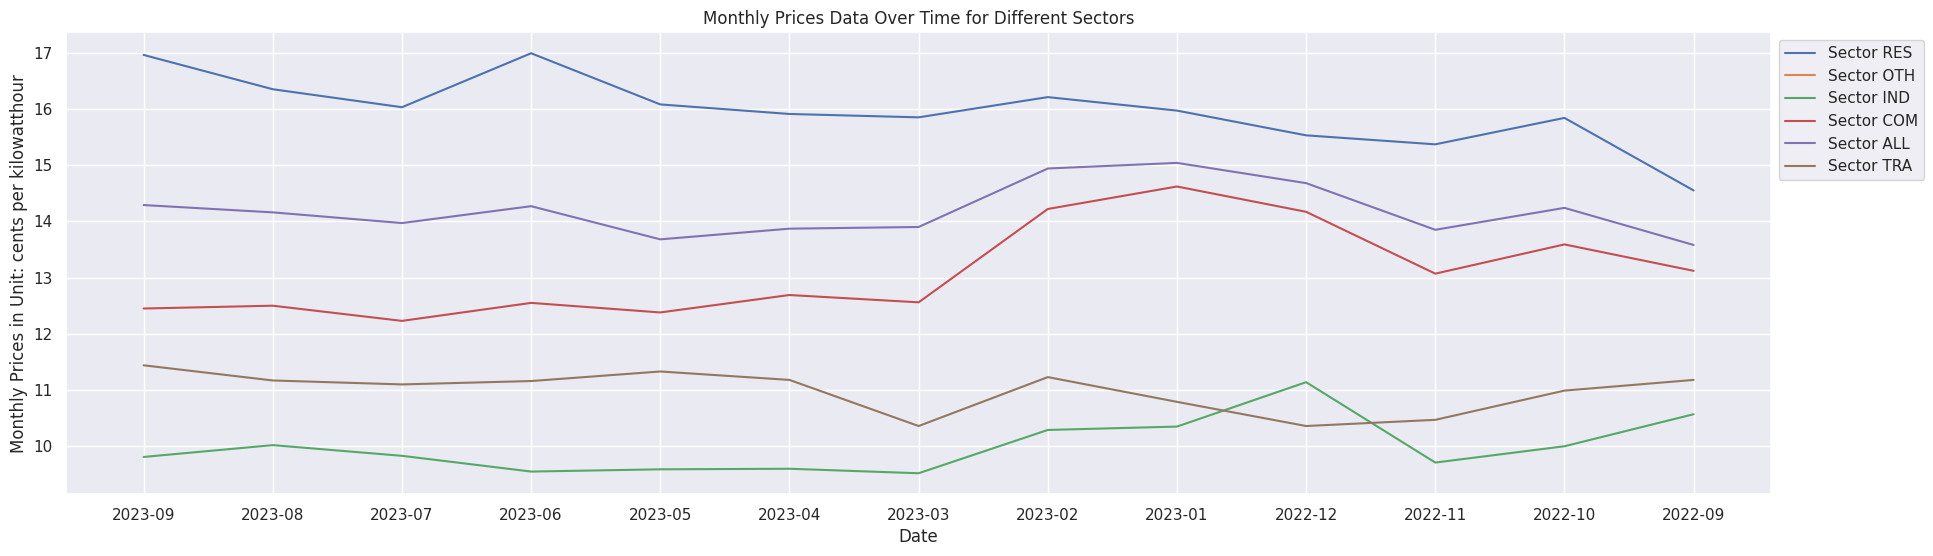

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(22, 6))

sales_data = df[df['stateid'] == 'MD']

sns.set()
for store in sales_data['sectorid'].unique():
    store_data = sales_data[sales_data['sectorid'] == store]
    plt.plot(store_data['period'], store_data['price'], label=f'Sector {store}')

plt.xlabel('Date')
plt.ylabel(f"Monthly Prices in Unit: {metrics['price-units']}")
plt.title('Monthly Prices Data Over Time for Different Sectors')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
